# Segmentation Preprocessing Notebook

## Introduction
This notebook contains the preprocessing explorations for the selected features in the previous notebook.  

The variables selected were selected for being possible candidates for use in clustering. This doesn't mean they will not be dropped.

The results of this notebook will be turned into the `preprocessing.py` file that will directly take as input the raw data in the AZDIAS and CUSTOMERS dataset

## Context/ Business Goal
The targeted company for this project is an **Organics** company that is selling **mail-ordered** products.

# Imports

In [1]:
# Data Wrangling
import pandas as pd
import numpy as np

# Data Viz
import seaborn as sns

In [2]:
census = pd.read_parquet('data/trusted/census_subset.parquet')

In [3]:
census.head()

,LNR,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,GEBURTSJAHR,KBA13_ANZAHL_PKW,MIN_GEBAEUDEJAHR,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,...,KBA13_BJ_2004,KBA13_SEG_GELAENDEWAGEN,KBA13_VORB_0,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET
0,910215,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,910220,11.0,0.0,2.0,0.0,1996,963.0,1992.0,0,0,...,3.0,2.0,3.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0
2,910225,10.0,0.0,1.0,0.0,1979,712.0,1992.0,0,0,...,4.0,5.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0
3,910226,1.0,0.0,0.0,0.0,1957,596.0,1997.0,0,0,...,3.0,3.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0
4,910241,3.0,0.0,4.0,0.0,1963,435.0,1992.0,1,2,...,3.0,3.0,4.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0


In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 196 entries, LNR to ONLINE_AFFINITAET
dtypes: float64(153), int64(41), object(2)
memory usage: 1.3+ GB


# Utils

In [5]:
def list_cols_by_type(frame, dtype):

    return frame.dtypes[frame.dtypes == dtype].index

# NaN distribution
A cut was made on the prior notebook, but it is important to know the general level of NaN values so we know how to handle them

In [6]:
nan_rate = census.isna()\
                    .mean()\
                    .sort_values()

<AxesSubplot: ylabel='Count'>

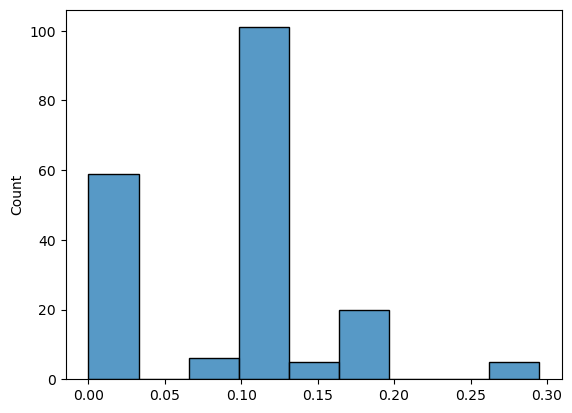

In [7]:
sns.histplot(data = nan_rate)

The majority of columns are missing up to 20% of data.

# Fixing object cols

In [8]:
object_cols = list_cols_by_type(census, 'object')

In [9]:
census[object_cols]

,OST_WEST_KZ,CAMEO_DEU_2015
0,None,None
1,W,8A
2,W,4C
3,W,2A
4,W,6B
...,...,...
891216,W,7A
891217,W,9D
891218,W,4C
891219,W,9D


## Ost - West

In [10]:
census['OST_WEST_KZ'].unique()

array([None, 'W', 'O'], dtype=object)

In [11]:
census['OST_WEST_KZ'] = census['OST_WEST_KZ'].map({'O':0,'W':1})

## CAMEO_DEU_2015

In [12]:
unique_vals_cameo = list(census['CAMEO_DEU_2015'].dropna().unique())

print(unique_vals_cameo)

['8A', '4C', '2A', '6B', '8C', '4A', '2D', '1A', '1E', '9D', '5C', '8B', '7A', '5D', '9E', '9B', '1B', '3D', '4E', '4B', '3C', '5A', '7B', '9A', '6D', '6E', '2C', '7C', '9C', '7D', '5E', '1D', '8D', '6C', '6A', '5B', '4D', '3A', '2B', '7E', '3B', '6F', '5F', '1C']


In [13]:
# Sorting values
unique_vals_cameo = sorted(unique_vals_cameo)

In [14]:
unique_vals_cameo

['1A',
 '1B',
 '1C',
 '1D',
 '1E',
 '2A',
 '2B',
 '2C',
 '2D',
 '3A',
 '3B',
 '3C',
 '3D',
 '4A',
 '4B',
 '4C',
 '4D',
 '4E',
 '5A',
 '5B',
 '5C',
 '5D',
 '5E',
 '5F',
 '6A',
 '6B',
 '6C',
 '6D',
 '6E',
 '6F',
 '7A',
 '7B',
 '7C',
 '7D',
 '7E',
 '8A',
 '8B',
 '8C',
 '8D',
 '9A',
 '9B',
 '9C',
 '9D',
 '9E']

From the 'Values' Spreasheet, we can see that these variables have an ordinal component to them. Therefore, each category will be associated to unique integers, like the other columns

In [15]:
int_range = range(1, len(unique_vals_cameo) + 1)

cameo_map = dict(zip(unique_vals_cameo, int_range))

In [16]:
assert max(int_range) == len(unique_vals_cameo)

In [17]:
census['CAMEO_DEU_2015'].head()

0    None
1      8A
2      4C
3      2A
4      6B
Name: CAMEO_DEU_2015, dtype: object

In [18]:
census['CAMEO_DEU_2015'] = census['CAMEO_DEU_2015'].map(cameo_map)

In [19]:
census['CAMEO_DEU_2015'].isna().mean()

0.11147852216229195

# Checking INT cols
Checking especially if there are any NaNs/ problems that were not identified and if the amount of actual unique categories in each column is helpful to use them as scale

In [20]:
int_col_list = list_cols_by_type(census, 'int64')

In [21]:
for col in int_col_list:

    print(col)

    print('# of unique values:', census[col].nunique(), f'min: {census[col].min()}', f'max: {census[col].max()}', end = '\n\n')

LNR
# of unique values: 891221 min: 191653 max: 1082873

GEBURTSJAHR
# of unique values: 117 min: 0 max: 2017

D19_BANKEN_DIREKT
# of unique values: 8 min: 0 max: 7

D19_BANKEN_GROSS
# of unique values: 7 min: 0 max: 6

D19_BANKEN_LOKAL
# of unique values: 8 min: 0 max: 7

D19_BANKEN_REST
# of unique values: 8 min: 0 max: 7

D19_BIO_OEKO
# of unique values: 8 min: 0 max: 7

D19_DIGIT_SERV
# of unique values: 8 min: 0 max: 7

D19_LEBENSMITTEL
# of unique values: 8 min: 0 max: 7

D19_VOLLSORTIMENT
# of unique values: 8 min: 0 max: 7

D19_VERSAND_REST
# of unique values: 8 min: 0 max: 7

D19_GESAMT_DATUM
# of unique values: 10 min: 1 max: 10

D19_BANKEN_DATUM
# of unique values: 10 min: 1 max: 10

D19_VERSAND_DATUM
# of unique values: 10 min: 1 max: 10

D19_GESAMT_ANZ_12
# of unique values: 7 min: 0 max: 6

D19_VERSAND_ANZ_12
# of unique values: 7 min: 0 max: 6

ALTERSKATEGORIE_GROB
# of unique values: 5 min: 1 max: 9

ANREDE_KZ
# of unique values: 2 min: 1 max: 2

FINANZ_MINIMALIST
# of 

Integer columns look OK, no out of ordinary values are in the maxima or minima

# Float columns
Some columns are actually numeric, but not all of them. This happens especially because of float values

In [22]:
num_cols = ['ANZ_HAUSHALTE_AKTIV',
            'ANZ_HH_TITEL',
            'ANZ_PERSONEN',
            'ANZ_TITEL',
            'GEBURTSJAHR',
            'KBA13_ANZAHL_PKW',
            'MIN_GEBAEUDEJAHR']

num_cols = np.intersect1d(census.columns, num_cols)

In [23]:
float_col_list = list_cols_by_type(census, 'float64')

In [24]:
cat_cols_as_float = list(set(float_col_list) - set(num_cols)) 

In [25]:
# Are all values >= 0?
((census[float_col_list] < 0).any() == False).all()

True

## Numeric Cols

In [26]:
census[num_cols].describe()

,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,GEBURTSJAHR,KBA13_ANZAHL_PKW,MIN_GEBAEUDEJAHR
count,798073.000000,794213.000000,817722.000000,817722.000000,891221.000000,785421.000000,798073.000000
mean,8.287263,0.040647,1.727637,0.004162,1101.178533,619.701439,1993.277011
std,15.628087,0.324028,1.155849,0.068855,976.583551,340.034318,3.332739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,384.000000,1992.000000
50%,4.000000,0.000000,1.000000,0.000000,1943.000000,549.000000,1992.000000
75%,9.000000,0.000000,2.000000,0.000000,1970.000000,778.000000,1993.000000
max,595.000000,23.000000,45.000000,6.000000,2017.000000,2300.000000,2016.000000


Some problems:

- Birthyear 0
- Number of persons in HOUSEHOLD having max at 45

#### Person count

In [27]:
census['ANZ_PERSONEN'].nunique()

30

In [28]:
census['ANZ_PERSONEN'].unique()

array([nan,  2.,  1.,  0.,  4.,  3.,  5.,  7.,  6.,  8., 12.,  9., 21.,
       10., 13., 11., 14., 45., 20., 31., 29., 37., 16., 22., 15., 23.,
       18., 35., 17., 40., 38.])

In [29]:
census[census['ANZ_PERSONEN'] >= 10].shape[0]

162

Only a few entries are greater than 10. Will not be handled

#### YoB 

In [30]:
census[census['GEBURTSJAHR'] == 0].shape

(392318, 196)

Year of Birth on the other hand has a lot of invalid entries. They account to almost half of the database, actually.

In [31]:
census['GEBURTSJAHR'].isna().mean()

0.0

In [32]:
census['GEBURTSJAHR'] = census['GEBURTSJAHR'].replace(0, np.nan)

In [33]:
census['GEBURTSJAHR'].isna().mean()

0.4402028228688507

40% of the year of birth isn't filled 

In [34]:
census['ALTERSKATEGORIE_GROB'].isna().mean()

0.0

but we do have a sense of age by the `ALTERSKATEGORIE_GROB` column. So birthyear might be dropped.

In [35]:
census.drop(columns = 'GEBURTSJAHR', inplace = True)

## Other Cols

In [36]:
# Looking for binary cols
for col in cat_cols_as_float:

    column = census[col].dropna()

    unique_values = column.unique()

    if len(unique_values) == 2:

        print(col, 'Binary')

VERS_TYP Binary
SOHO_KZ Binary
OST_WEST_KZ Binary


These are in fact binary

In [37]:
(census[cat_cols_as_float] < 0).any().sum()

0

No columns present negative values

# Segregating columns by type

Segregation was done manually on the 'Values' file

In [38]:
att_info = pd.read_excel('data/raw/DIAS Attributes - Values 2017.xlsx', usecols = 'B:E', header = 1)

In [39]:
var_types = att_info[['Attribute','Type']].dropna()

In [40]:
len(census.columns)

195

In [41]:
var_types[var_types['Attribute'].isin(census.columns.drop('LNR'))]

,Attribute,Type
5,ALTERSKATEGORIE_GROB,interval
33,ANREDE_KZ,binary
36,ANZ_HAUSHALTE_AKTIV,numeric
37,ANZ_HH_TITEL,numeric
38,ANZ_PERSONEN,numeric
...,...,...
2216,VERS_TYP,binary
2219,WOHNDAUER_2008,interval
2229,WOHNLAGE,interval
2244,W_KEIT_KIND_HH,interval


In [42]:
not_found = np.setdiff1d(census.columns, var_types['Attribute'])

print(not_found)

['ALTERSKATEGORIE_FEIN' 'ANZ_KINDER' 'ANZ_STATISTISCHE_HAUSHALTE' 'ARBEIT'
 'CJT_KATALOGNUTZER' 'CJT_TYP_1' 'CJT_TYP_2' 'CJT_TYP_3' 'CJT_TYP_4'
 'CJT_TYP_5' 'CJT_TYP_6' 'D19_BANKEN_DIREKT' 'D19_BANKEN_GROSS'
 'D19_BANKEN_LOKAL' 'D19_BANKEN_REST' 'D19_BIO_OEKO' 'D19_DIGIT_SERV'
 'D19_LEBENSMITTEL' 'D19_VERSAND_REST' 'D19_VOLLSORTIMENT' 'KBA13_BAUMAX'
 'KBA13_CCM_1401_2500' 'KBA13_GBZ' 'KBA13_HHZ' 'KBA13_KMH_210' 'LNR'
 'SOHO_KZ' 'STRUKTURTYP']


In [43]:
# Manually assigning types to variables not found because of name matching problems
new_rows = [('ALTERSKATEGORIE_FEIN','interval'),
            ('ANZ_KINDER','numeric'),
            ('ANZ_STATISTISCHE_HAUSHALTE','numeric'),
            ('ARBEIT',),
            ('CJT_KATALOGNUTZER','interval'),
            ('CJT_TYP_1','binary'),
            ('CJT_TYP_2','binary'),
            ('CJT_TYP_3','binary'),
            ('CJT_TYP_4','binary'),
            ('CJT_TYP_5','binary'),
            ('CJT_TYP_6','binary'),
            ('D19_BANKEN_DIREKT','interval'),
            ('D19_BANKEN_GROSS','interval'),
            ('D19_BANKEN_LOKAL','interval'),
            ('D19_BANKEN_REST','interval'),
            ('D19_BIO_OEKO','interval'),
            ('D19_DIGIT_SERV','interval'),
            ('D19_LEBENSMITTEL','interval'),
            ('D19_VERSAND_REST','interval'),
            ('D19_VOLLSORTIMENT','interval'),
            ('KBA13_BAUMAX','interval'),
            ('KBA13_CCM_1401_2500','interval'),
            ('KBA13_GBZ','interval'),
            ('KBA13_HHZ','interval'),
            ('KBA13_KMH_210','interval'),
            ('SOHO_KZ','binary'),
            ('STRUKTURTYP','nominal')]

In [44]:
new_rows_frame = pd.DataFrame(new_rows, columns = ['Attribute', 'Type'])

In [45]:
var_types = pd.concat([var_types, new_rows_frame], axis = 0)

In [46]:
census.shape

(891221, 195)

In [47]:
census_var_types = var_types[var_types['Attribute'].isin(census.columns.drop('LNR'))]

In [48]:
census_var_types['Type'].value_counts()

interval    160
nominal      14
binary       11
numeric       8
Name: Type, dtype: int64

In [49]:
# Exporting for use in .py later-on
census_var_types.to_csv('data/trusted/census_var_types.csv')

If we were only handling numeric and interval variables, it would be possible to use PCA. Since this is not possible, another method will be used: Factor Analysis of Mixed Data (FAMD).  

Before we move on to modelling, we need to first adopt inputing strategies for the remaining cols

# Imputing strategy

Given the variable characteristics and the distribution of NaN proportion above, the following inputing strategy will be followed:

Categorical variables include: Interval, Nominal and Binary  
For categorical variables, inpute the mode


Numerical will be replaced with mean, for simplicity

## Categorical Imputing

In [50]:
cat_cols = census_var_types[census_var_types['Type'].isin(['interval', 'nominal', 'binary'])]['Attribute'].values

cat_cols = list(np.intersect1d(cat_cols, census.columns))

In [51]:
for col in cat_cols:

    nan_rate = census[col].isna().mean()

    if nan_rate <= 0.1:

        census[col].fillna(census[col].mode()[0], inplace = True)
    
    else:

        continue

## Numerical Imputing

In [52]:
num_cols = census_var_types[~census_var_types['Type'].isin(['interval', 'nominal', 'binary'])]['Attribute'].values

In [53]:
for col in num_cols:

    census[col].fillna(census[col].mean(), inplace = True)

# Preproc TO-DOs

- Binarize ANZ_HH_TITEL
- Drop YoB
- Aggregate values:
    - 125 Grid - D19 cols
    - household - D19 cols
- Person cols:
    - Drop "fein" variables
    - Drop Soho KZ
- PLZ8
    - Select relevant variable sets that will be kept
        - Owner Age
        - Speed